# Segmenting and Clustering Neighborhoods of Mumbai City to find optimal location for a resaurent  

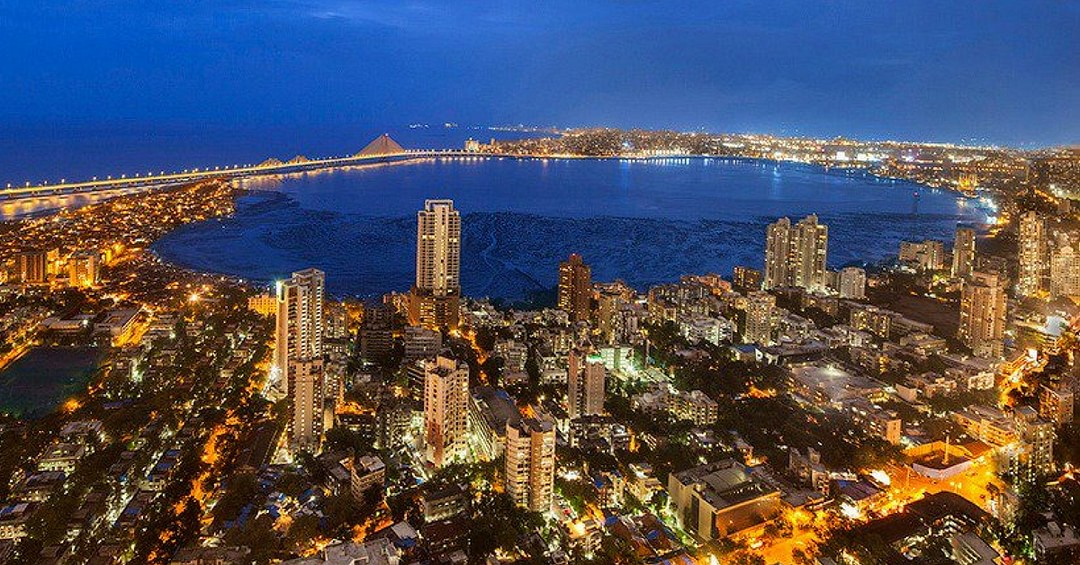

<h1 style="text-align:justify">1. Introduction</h1>
<h2 style="text-align:justify">1.1 Background Information:</h2>
<p style="text-align:justify; text-indent: 50x";> Mumbai, formerly known as Bombay, is the capital city of  Maharashtra. The Greater Mumbai area occupies a long, narrow peninsula in the Arabian Sea on the west coast of India. Mumbai is the most populous city in India and in the top five in the world. While the 2011 census estimated population at 12.4 million. Mumbai is the financial center, economic powerhouse, and industrial hub of India. In 2018, a report by New World Wealth ranked the city as the 12th wealthiest global city with a total private wealth of US Dollar 950 billion. 
<p style="text-align:justify">The Mumbai city is one of the world’s top centers of commerce in terms of financial flow. It is also home to important financial institutions, such as the Reserve Bank of India, the Bombay Stock Exchange, the National Stock Exchange of India, and corporate headquarters of many Indian companies and multinational corporations.</p>
<h2 style="text-align:justify">1.2 Discription of problem:</h2>
<p style="text-align:justify">Mubai is rich in its Indian cuisine. It has huge variety of Indian foods from different parts of India. Mumbai seems to be a better place for setting up an Indian restaurant. Since there are lots of restaurants in Mumbai we will try to detect locations that are not already crowded with restaurants. We are also particularly interested in areas with samaller number of Indian restaurants in vicinity.</p>
<h2 style="text-align:justify">1.3 Target Audience:</h2>
<p style="text-align:justify">Companies or Individuals looking into opening a restaurant would be interested in prediction of optimal location in Mumbai City. This project will provide an analysis whether the venture is feasible or not.</p>

We will go through each step of this project and address them separately. For this week I just describe the intial data preparation and future steps to start the project. 
1. Obtain the Data:
<p>1.a Name of the 93 neighbourhoods,31 boroughs and coordinates of each neighbourhood from web scrapping</p>
<p>1.b Use Foresquare Data to obtain info about restaurants.</p>
2. Data Visualization and Some Simple Statistical Analysis. 
3. Analysis Using Clustering, Specially K-Means Clustering.
4. Compare the Neighborhoods to Find the Best Place for Starting up a Restaurant.   
5. Inference From these Results and related Conclusions.

# 2. Data Acquisition and Data Cleaning

## 2.1 Data Soueces

First, we will import all the python packages and python libraries required.

In [50]:
import requests
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

Now, We will get the information of Mumbai Neighbourhoods from the wikipedia link given in the code cell below.

In [51]:
url= 'https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai'
html_txt= requests.get(url).text# get the contents of the webpage in text format and store in a variable called html_txt.


To parse the webpage, We will pass it into the <code>BeautifulSoup constructor</code>, the <code>BeautifulSoup</code> object, which represents the document as a nested data structure:


In [52]:
soup = BeautifulSoup(html_txt, "html5lib")
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of neighbourhoods in Mumbai - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"658ed84f-cd06-4ca7-bfc9-ea8ef2d46f87","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_neighbourhoods_in_Mumbai","wgTitle":"List of neighbourhoods in Mumbai","wgCurRevisionId":1019667154,"wgRevisionId":1019667154,"wgArticleId":37060396,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: unfit URL","Harv and Sfn no-target errors","Use dmy dates from February 2019","U

In [53]:
Mumbai_Table = soup.find_all('table')
Mumbai_Table #find all html tables in the web page

[<table class="wikitable sortable">
 <tbody><tr>
 <th>Area
 </th>
 <th>Location
 </th>
 <th>Latitude
 </th>
 <th>Longitude
 </th></tr>
 <tr>
 <td>Amboli
 </td>
 <td>Andheri,Western Suburbs
 </td>
 <td>19.1293
 </td>
 <td>72.8434
 </td></tr>
 <tr>
 <td>Chakala, Andheri
 </td>
 <td>Western Suburbs
 </td>
 <td>19.111388
 </td>
 <td>72.860833
 </td></tr>
 <tr>
 <td>D.N. Nagar
 </td>
 <td>Andheri,Western Suburbs
 </td>
 <td>19.124085
 </td>
 <td>72.831373
 </td></tr>
 <tr>
 <td>Four Bungalows
 </td>
 <td>Andheri,Western Suburbs
 </td>
 <td>19.124714
 </td>
 <td>72.82721
 </td></tr>
 <tr>
 <td>Lokhandwala
 </td>
 <td>Andheri,Western Suburbs
 </td>
 <td>19.130815
 </td>
 <td>72.82927
 </td></tr>
 <tr>
 <td>Marol
 </td>
 <td>Andheri,Western Suburbs
 </td>
 <td>19.119219
 </td>
 <td>72.882743
 </td></tr>
 <tr>
 <td>Sahar
 </td>
 <td>Andheri,Western Suburbs
 </td>
 <td>19.098889
 </td>
 <td>72.867222
 </td></tr>
 <tr>
 <td>Seven Bungalows
 </td>
 <td>Andheri,Western Suburbs
 </td>
 <td>19.129052

In [54]:
len(Mumbai_Table) # we can see how many tables were found by checking the length of the tables list

1

So, It appears that the webpage contains only one table. Our next task is to convert html table into a pandas dataframe. We will start by creating an empty dataframe. Then, we wil loop through the data and fill the dataframe one row at a time.

In [55]:
Mumbai = pd.DataFrame(columns=["Neighbourhood", "Borough","Latitude", "Longitude"])
for row in Mumbai_Table[0].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        neighbourhood = col[0].text.strip()
        borough = col[1].text.strip()
        latitude = col[2].text.strip()
        longitude = col[3].text.strip()
        Mumbai= Mumbai.append({"Neighbourhood":neighbourhood, "Borough":borough, "Latitude":latitude, "Longitude":longitude}, ignore_index=True)
Mumbai

,Neighbourhood,Borough,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.1293,72.8434
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.82721
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.82927
...,...,...,...,...
88,Parel,South Mumbai,18.99,72.84
89,Gowalia Tank,"Tardeo,South Mumbai",18.96245,72.809703
90,Dava Bazaar,South Mumbai,18.946882,72.831362
91,Dharavi,Mumbai,19.040208,72.85085


## 2.2 Data Cleaning

 - Now, some of the neighbourhood and borough names in dataframe are wrong. So, we will correct those names and then examine the dataframe.

In [56]:
Mumbai.loc[1,'Neighbourhood']='Chakala'
Mumbai.loc[38,'Neighbourhood']='Asalpha'
Mumbai.loc[1,'Borough']='Andheri,Western Suburbs'
Mumbai.loc[79,'Neighbourhood']='CGS Colony'
Mumbai.loc[80,'Neighbourhood']='Dr.Babasaheb Ambedkar Marg'
Mumbai.loc[84,'Neighbourhood']='Bhuleshwar'
Mumbai.loc[90,'Neighbourhood']='Cama Hospital'
Mumbai.loc[57, 'Neighbourhood']= 'Cavel'

Mumbai.reset_index()
Mumbai.head(50)

,Neighbourhood,Borough,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.1293,72.8434
1,Chakala,"Andheri,Western Suburbs",19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.82721
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.82927
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
8,Versova,"Andheri,Western Suburbs",19.12,72.82
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111


In [57]:
Mumbai.tail(43)

,Neighbourhood,Borough,Latitude,Longitude
50,Mankhurd,Harbour Suburbs,19.05,72.93
51,Mahul,"Trombay,Harbour Suburbs",19,72.883333
52,Agripada,South Mumbai,18.9777,72.8273
53,Altamount Road,South Mumbai,18.9681,72.8095
54,Bhuleshwar,South Mumbai,18.95,72.83
55,Breach Candy,South Mumbai,18.967,72.805
56,Carmichael Road,South Mumbai,18.9722,72.8113
57,Cavel,South Mumbai,18.9474,72.8272
58,Churchgate,South Mumbai,18.93,72.82
59,Cotton Green,South Mumbai,18.986209,72.844076


 - Now, I found some wrong coordinates and therefore I veryfied this information using geopy package of python. Most of the coordinates received using geopy python package differed from the coordinates given in the website. Therefore, I replaced the coordinates of the dataframe

In [58]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="Mumbai_explorer")

In [59]:
latitude=[]
longitude=[]
for neighbourhood in Mumbai['Neighbourhood']:
    loc=neighbourhood+', Mumbai'
    location=geolocator.geocode(loc)
    print(neighbourhood,location.latitude, location.longitude)
    latitude.append(location.latitude)
    longitude.append(location.longitude)

Amboli 19.13201 72.8498644
Chakala 19.1152873 72.8618085
D.N. Nagar 19.12829205 72.83019335523952
Four Bungalows 19.1287942 72.8255543
Lokhandwala 19.1431889 72.824081
Marol 19.1172198 72.882342
Sahar 19.10066 72.8667797
Seven Bungalows 19.1297617 72.8213781
Versova 19.13025205 72.8213774957082
Mira Road 19.2816975 72.8560676
Bhayandar 19.1971521 72.8113662
Uttan 19.2533188 72.7905148
Bandstand Promenade 19.0523878 72.8217267
Kherwadi 19.0612177 72.8448733
Pali Hill 19.0649126 72.8270326
I.C. Colony 19.2446251 72.8479254
Gorai 19.241013 72.7821985
Dahisar 19.2494501 72.8596206
Aarey Milk Colony 19.1561292 72.8707223
Bangur Nagar 19.1688142 72.8336777
Jogeshwari West 19.136394 72.8373817
Juhu 19.1070215 72.8275275
Charkop 19.2141193 72.8258652
Poisar 19.2132196 72.8466024
Mahavir Nagar 19.2143002 72.8375468
Thakur village 19.2097189 72.8759248
Pali Naka 19.0627851 72.8293905
Khar Danda 19.07596835 72.82473096096531
Dindoshi 19.1740198 72.8695219
Sunder Nagar 19.1732766 72.8407686
Kalina

In [60]:
Mumbai= Mumbai.assign(Latitude=latitude, Longitude=longitude) 
Mumbai.tail(50)

,Neighbourhood,Borough,Latitude,Longitude
43,Chandivali,"Powai,Eastern Suburbs",19.109148,72.894579
44,Hiranandani Gardens,"Powai,Eastern Suburbs",19.114405,72.911050
45,Indian Institute of Technology Bombay campus,"Powai,Eastern Suburbs",19.132619,72.914979
46,Vidyavihar,Eastern Suburbs,19.079629,72.897491
47,Vikhroli,Eastern Suburbs,19.111480,72.928021
48,Chembur,Harbour Suburbs,19.062632,72.901140
49,Deonar,"Govandi,Harbour Suburbs",19.047550,72.905190
50,Mankhurd,Harbour Suburbs,19.052083,72.933916
51,Mahul,"Trombay,Harbour Suburbs",19.014178,72.897234
52,Agripada,South Mumbai,18.975302,72.824898


In [61]:
Mumbai.loc[57, 'Latitude']= 19.0167
Mumbai.loc[57, 'Longitude']= 72.85
Mumbai.loc[92, 'Latitude']= 19.0760
Mumbai.loc[92, 'Longitude']= 72.8787

Mumbai.tail(50)


,Neighbourhood,Borough,Latitude,Longitude
43,Chandivali,"Powai,Eastern Suburbs",19.109148,72.894579
44,Hiranandani Gardens,"Powai,Eastern Suburbs",19.114405,72.911050
45,Indian Institute of Technology Bombay campus,"Powai,Eastern Suburbs",19.132619,72.914979
46,Vidyavihar,Eastern Suburbs,19.079629,72.897491
47,Vikhroli,Eastern Suburbs,19.111480,72.928021
48,Chembur,Harbour Suburbs,19.062632,72.901140
49,Deonar,"Govandi,Harbour Suburbs",19.047550,72.905190
50,Mankhurd,Harbour Suburbs,19.052083,72.933916
51,Mahul,"Trombay,Harbour Suburbs",19.014178,72.897234
52,Agripada,South Mumbai,18.975302,72.824898


## 3. Methodology

#### Use geopy library to get the latitude and longitude values of Mumbai City.


In [62]:
address = 'Mumbai'

geolocator = Nominatim(user_agent="mumbai_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai city are 19.0759899, 72.8773928.


#### Create a map of Mumbai with neighborhoods superimposed on top.


In [100]:
import folium
# create map of Manhattan using latitude and longitude values
map_mumbai = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Mumbai['Latitude'], Mumbai['Longitude'], Mumbai['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mumbai)  
    
map_mumbai

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.


#### Define Foursquare Credentials and Version


In [64]:
CLIENT_ID = 'GXPUANRGBMKVVADOO51YPDAITVHXNEWAF213X5J32UVQHSY5' # your Foursquare ID
CLIENT_SECRET = 'SGMWBY0VMKA0Z0CD2WUKNT2IMCSCHD4LCUT4A3YZR4RINHHG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GXPUANRGBMKVVADOO51YPDAITVHXNEWAF213X5J32UVQHSY5
CLIENT_SECRET:SGMWBY0VMKA0Z0CD2WUKNT2IMCSCHD4LCUT4A3YZR4RINHHG


#### Let's create a function to explore all the neighborhoods in Mumbai

1. Create the get request url (Foursquare ID and Secret are necessary) <br>
    1.a. Number of Venues we will look for is 100
    2.a. Radius of Search Would be 500 m. 
2. Create a json from  the request object (Need requests Module) <br>
3. Create the lists Containing all the information <br>
4. From the lists create the dataframe. 


In [65]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called  Mumbai_venues.


In [66]:
Mumbai_venues= getNearbyVenues(names=Mumbai['Neighbourhood'],
                                  latitudes= Mumbai['Latitude'],
                                  longitudes= Mumbai['Longitude'])
Mumbai_venues

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Amboli,19.132010,72.849864,"5 Spice , Bandra",19.130421,72.847206,Chinese Restaurant
1,Amboli,19.132010,72.849864,Domino's Pizza,19.131000,72.848000,Pizza Place
2,Amboli,19.132010,72.849864,Cafe Arfa,19.128930,72.847140,Indian Restaurant
3,Amboli,19.132010,72.849864,Bostan Restaurant,19.135898,72.847581,Asian Restaurant
4,Chakala,19.115287,72.861808,Courtyard Mumbai International Airport,19.114167,72.864131,Hotel
...,...,...,...,...,...,...,...
1301,Thane,19.076000,72.878700,Sahara Restaurant,19.079532,72.880152,Mughlai Restaurant
1302,Thane,19.076000,72.878700,Nawab Sheek Corner,19.076933,72.878260,Middle Eastern Restaurant
1303,Thane,19.076000,72.878700,Vigour gym,19.075981,72.877656,Gym
1304,Thane,19.076000,72.878700,Mithi Nadi,19.076005,72.874680,River


#### Let's check the size of the resulting dataframe


In [67]:
print(Mumbai_venues.shape)
Mumbai_venues.head()

(1306, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Amboli,19.132010,72.849864,"5 Spice , Bandra",19.130421,72.847206,Chinese Restaurant
1,Amboli,19.132010,72.849864,Domino's Pizza,19.131000,72.848000,Pizza Place
2,Amboli,19.132010,72.849864,Cafe Arfa,19.128930,72.847140,Indian Restaurant
3,Amboli,19.132010,72.849864,Bostan Restaurant,19.135898,72.847581,Asian Restaurant
4,Chakala,19.115287,72.861808,Courtyard Mumbai International Airport,19.114167,72.864131,Hotel


In [68]:
len(Mumbai_venues['Venue Category'].unique())

176

### Analyze Each Neighborhood


In [69]:
# one hot encoding
mumbai_onehot = pd.get_dummies(Mumbai_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mumbai_onehot['Neighbourhood'] = Mumbai_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [mumbai_onehot.columns[-1]] + list(mumbai_onehot.columns[:-1])
mumbai_onehot = mumbai_onehot[fixed_columns]

mumbai_onehot.head()

,Neighbourhood,ATM,Afghan Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Track Stadium,Train Station,Tunnel,Vegetarian / Vegan Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amboli,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Chakala,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.


In [70]:
mumbai_onehot.shape

(1306, 177)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [71]:
mumbai_grouped = mumbai_onehot.groupby('Neighbourhood').mean().reset_index()
mumbai_grouped

,Neighbourhood,ATM,Afghan Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Track Stadium,Train Station,Tunnel,Vegetarian / Vegan Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Aarey Milk Colony,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.000
1,Agripada,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.2,0.0,...,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.000
2,Altamount Road,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.000
3,Amboli,0.0,0.000000,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.000
4,Amrut Nagar,0.0,0.047619,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Vidyavihar,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.000
87,Vikhroli,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.111111,0.000,0.0,0.0,0.0,0.0,0.000
88,Vile Parle,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.043478,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.000
89,Walkeshwar,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.000


#### Let's confirm the new size


In [72]:
mumbai_grouped.shape

(91, 177)

#### Let's put each neighborhood along with the top 5 most common venues in a pandas dataframe.


In [73]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [74]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = mumbai_grouped['Neighbourhood']

for ind in np.arange(mumbai_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mumbai_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Aarey Milk Colony,Fast Food Restaurant,Women's Store,French Restaurant,Food Truck,Food Court
1,Agripada,Coffee Shop,Soccer Field,Platform,Athletics & Sports,Bakery
2,Altamount Road,Café,Coffee Shop,Restaurant,Salon / Barbershop,Bookstore
3,Amboli,Indian Restaurant,Asian Restaurant,Pizza Place,Chinese Restaurant,Field
4,Amrut Nagar,Indian Restaurant,Electronics Store,Steakhouse,Restaurant,Fast Food Restaurant
...,...,...,...,...,...,...
86,Vidyavihar,Fast Food Restaurant,Restaurant,Cricket Ground,Juice Bar,Comedy Club
87,Vikhroli,Café,Restaurant,Racetrack,Vegetarian / Vegan Restaurant,Seafood Restaurant
88,Vile Parle,Indian Restaurant,Fast Food Restaurant,Sandwich Place,Café,Tea Room
89,Walkeshwar,Ice Cream Shop,Restaurant,Food & Drink Shop,Park,Food Truck


### Cluster Neighborhoods


First, Let's import all the libraries needed.

In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
mumbai_vs1= mumbai_grouped.drop(['Neighbourhood'], axis=1) #drop the neighbourhood column from mumbai_grouped dataframe


To give equal importance to all features, we need to scale the continuous features. We will be using scikit-learn’s MinMaxScaler as the feature matrix.

In [77]:
mms = MinMaxScaler()
mms.fit(mumbai_vs1)
data_transformed = mms.transform(mumbai_vs1)

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.

In [78]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    

Below is a plot of sum of squared distances for k in the range specified above.

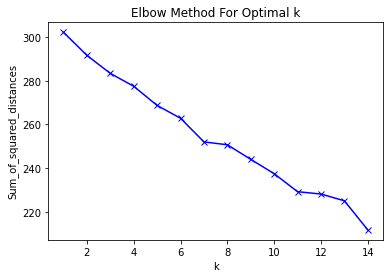

In [79]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


I tried to use elbow method for deciding the number of clusters. But, as shown above the graph is not in clear elbow shape. So, I apporaximately selected number of clusters as 5 and applies  K-Means methos to cluster the neighbourhoods into 5 clusters. 

Run _k_-means to cluster the neighborhood into 5 clusters.


In [80]:
# set number of clusters
kclusters = 5

mumbai_grouped_clustering = mumbai_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mumbai_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 4, 4, 0, 0, 4, 4, 4, 4, 0])

Let's create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood.


In [81]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

mumbai_merged = Mumbai

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
mumbai_merged = mumbai_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

mumbai_merged

,Neighbourhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Amboli,"Andheri,Western Suburbs",19.132010,72.849864,0.0,Indian Restaurant,Asian Restaurant,Pizza Place,Chinese Restaurant,Field
1,Chakala,"Andheri,Western Suburbs",19.115287,72.861808,4.0,Hotel,Restaurant,Café,Multiplex,Fast Food Restaurant
2,D.N. Nagar,"Andheri,Western Suburbs",19.128292,72.830193,4.0,Indian Restaurant,Coffee Shop,Women's Store,Gym / Fitness Center,Liquor Store
3,Four Bungalows,"Andheri,Western Suburbs",19.128794,72.825554,4.0,Department Store,Indian Restaurant,Bar,Women's Store,Juice Bar
4,Lokhandwala,"Andheri,Western Suburbs",19.143189,72.824081,0.0,Indian Restaurant,Café,Bakery,Pizza Place,Cupcake Shop
...,...,...,...,...,...,...,...,...,...,...
88,Parel,South Mumbai,19.009482,72.837661,4.0,Bakery,Coffee Shop,Restaurant,Dessert Shop,Movie Theater
89,Gowalia Tank,"Tardeo,South Mumbai",18.962095,72.810098,4.0,Café,Bookstore,Gift Shop,Salon / Barbershop,Gastropub
90,Cama Hospital,South Mumbai,18.942041,72.832259,4.0,Café,Bar,Coffee Shop,Indian Restaurant,Multiplex
91,Dharavi,Mumbai,19.044463,72.858618,4.0,Indian Restaurant,Snack Place,Café,Gym / Fitness Center,Fast Food Restaurant


In [99]:
mumbai_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True) #drop the rows that include nan value for cluster labels. 
mumbai_merged

,Neighbourhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Amboli,"Andheri,Western Suburbs",19.132010,72.849864,0.0,Indian Restaurant,Asian Restaurant,Pizza Place,Chinese Restaurant,Field
1,Chakala,"Andheri,Western Suburbs",19.115287,72.861808,4.0,Hotel,Restaurant,Café,Multiplex,Fast Food Restaurant
2,D.N. Nagar,"Andheri,Western Suburbs",19.128292,72.830193,4.0,Indian Restaurant,Coffee Shop,Women's Store,Gym / Fitness Center,Liquor Store
3,Four Bungalows,"Andheri,Western Suburbs",19.128794,72.825554,4.0,Department Store,Indian Restaurant,Bar,Women's Store,Juice Bar
4,Lokhandwala,"Andheri,Western Suburbs",19.143189,72.824081,0.0,Indian Restaurant,Café,Bakery,Pizza Place,Cupcake Shop
...,...,...,...,...,...,...,...,...,...,...
88,Parel,South Mumbai,19.009482,72.837661,4.0,Bakery,Coffee Shop,Restaurant,Dessert Shop,Movie Theater
89,Gowalia Tank,"Tardeo,South Mumbai",18.962095,72.810098,4.0,Café,Bookstore,Gift Shop,Salon / Barbershop,Gastropub
90,Cama Hospital,South Mumbai,18.942041,72.832259,4.0,Café,Bar,Coffee Shop,Indian Restaurant,Multiplex
91,Dharavi,Mumbai,19.044463,72.858618,4.0,Indian Restaurant,Snack Place,Café,Gym / Fitness Center,Fast Food Restaurant


Finally, let's visualize the resulting clusters


In [83]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mumbai_merged['Latitude'], mumbai_merged['Longitude'], mumbai_merged['Neighbourhood'], mumbai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 4. Result

### Let's examine all 5 clusters.

### Cluster 0

In [84]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 0, mumbai_merged.columns[[0] + list(range(4, mumbai_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Amboli,0.0,Indian Restaurant,Asian Restaurant,Pizza Place,Chinese Restaurant,Field
4,Lokhandwala,0.0,Indian Restaurant,Café,Bakery,Pizza Place,Cupcake Shop
5,Marol,0.0,Indian Restaurant,Hotel,Diner,Bus Station,Snack Place
6,Sahar,0.0,Indian Restaurant,Hotel Bar,Hotel,Gym,Farmers Market
13,Kherwadi,0.0,Indian Restaurant,Pizza Place,Café,Tunnel,Gym / Fitness Center
15,I.C. Colony,0.0,Indian Restaurant,Chinese Restaurant,Bar,Liquor Store,Food Truck
17,Dahisar,0.0,Indian Restaurant,Diner,Restaurant,Pizza Place,Train Station
25,Thakur village,0.0,Ice Cream Shop,Indian Restaurant,Pizza Place,Gym,General Entertainment
31,Naigaon,0.0,Indian Restaurant,Gym,Historic Site,Grocery Store,Food Court
35,Vile Parle,0.0,Indian Restaurant,Fast Food Restaurant,Sandwich Place,Café,Tea Room


### Cluster 1

In [85]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 1, mumbai_merged.columns[[0] + list(range(4, mumbai_merged.shape[1]))]]



,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
51,Mahul,1.0,ATM,Women's Store,French Restaurant,Food Truck,Food Court


### Cluster 2

In [86]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 2, mumbai_merged.columns[[0] + list(range(4, mumbai_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
18,Aarey Milk Colony,2.0,Fast Food Restaurant,Women's Store,French Restaurant,Food Truck,Food Court
46,Vidyavihar,2.0,Fast Food Restaurant,Restaurant,Cricket Ground,Juice Bar,Comedy Club


### Cluster 3

In [87]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 3, mumbai_merged.columns[[0] + list(range(4, mumbai_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
81,Navy Nagar,3.0,Garden,Women's Store,French Restaurant,Food Truck,Food Court


### Cluster 4

In [88]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 4, mumbai_merged.columns[[0] + list(range(4, mumbai_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Chakala,4.0,Hotel,Restaurant,Café,Multiplex,Fast Food Restaurant
2,D.N. Nagar,4.0,Indian Restaurant,Coffee Shop,Women's Store,Gym / Fitness Center,Liquor Store
3,Four Bungalows,4.0,Department Store,Indian Restaurant,Bar,Women's Store,Juice Bar
7,Seven Bungalows,4.0,Pub,Café,Chinese Restaurant,Coffee Shop,Bistro
8,Versova,4.0,Pub,Chinese Restaurant,Café,Coffee Shop,Bar
...,...,...,...,...,...,...,...
87,Matunga,4.0,Indian Restaurant,Vegetarian / Vegan Restaurant,Bar,Snack Place,Café
88,Parel,4.0,Bakery,Coffee Shop,Restaurant,Dessert Shop,Movie Theater
89,Gowalia Tank,4.0,Café,Bookstore,Gift Shop,Salon / Barbershop,Gastropub
90,Cama Hospital,4.0,Café,Bar,Coffee Shop,Indian Restaurant,Multiplex


#### Now, If the neighbourhood contains Indian Restaurant, then let's create a function to count the number of indian restaurants that neighbourhood contains.

In [89]:
Mumbai_Venues_restaurant = Mumbai_venues.groupby(['Neighbourhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Indian Restaurant')].count())
Mumbai_Venues_restaurant_df = Mumbai_Venues_restaurant.to_frame().reset_index()
Mumbai_Venues_restaurant_df.columns = ['Neighbourhood', 'Number of Indian Restaurant']
#Tokyo_5_Dist_Venues_restaurant.columns = ['District', 'Number of Restaurant']
#print (type(Tokyo_5_Dist_Venues_restaurant))
Mumbai_Venues_restaurant_df.index = np.arange(1, len(Mumbai_Venues_restaurant_df)+1)


In [90]:
Mumbai_venues_IndianRestaurant= Mumbai_Venues_restaurant_df[Mumbai_Venues_restaurant_df['Number of Indian Restaurant']>0]
Mumbai_venues_IndianRestaurant

,Neighbourhood,Number of Indian Restaurant
3,Altamount Road,1
4,Amboli,1
5,Amrut Nagar,5
7,Ballard Estate,3
8,Bandstand Promenade,2
...,...,...
82,Sunder Nagar,1
83,Thakur village,3
84,Thane,1
86,Versova,2


In [91]:
Mumbai_venues_IndianRestaurant.reset_index(drop=True)

,Neighbourhood,Number of Indian Restaurant
0,Altamount Road,1
1,Amboli,1
2,Amrut Nagar,5
3,Ballard Estate,3
4,Bandstand Promenade,2
...,...,...
59,Sunder Nagar,1
60,Thakur village,3
61,Thane,1
62,Versova,2


### Now, Let's compare all the neighbourhoods with 1st Most Common Venue as Indian Restaurant to find the optimal location for opening an Indian Restaurant.

First, Let's create a dataframe contaning neighbourhoods and mean of the frequency of the 'Indian Restaurant' venue category for each neighbourhood. 

In [92]:
Mumbai_Indian_Restaurants= mumbai_grouped[['Neighbourhood', 'Indian Restaurant']]
Mumbai_Indian_Restaurants

,Neighbourhood,Indian Restaurant
0,Aarey Milk Colony,0.000000
1,Agripada,0.000000
2,Altamount Road,0.062500
3,Amboli,0.250000
4,Amrut Nagar,0.238095
...,...,...
86,Vidyavihar,0.000000
87,Vikhroli,0.000000
88,Vile Parle,0.217391
89,Walkeshwar,0.000000


Now, Let's create a list of all the neighbourhoods that have 'Indian Restaurant' as 1st Most Common Venue Category.

In [93]:
y= []
for  i,row in mumbai_merged.iterrows():
    if mumbai_merged.loc[i,'1st Most Common Venue']=='Indian Restaurant':
        y.append(mumbai_merged.loc[i,'Neighbourhood'])
y
    

['Amboli',
 'D.N. Nagar',
 'Lokhandwala',
 'Marol',
 'Sahar',
 'Bandstand Promenade',
 'Kherwadi',
 'Pali Hill',
 'I.C. Colony',
 'Dahisar',
 'Charkop',
 'Pali Naka',
 'Dindoshi',
 'Naigaon',
 'Vile Parle',
 'Bhandup',
 'Amrut Nagar',
 'Nahur',
 'Hiranandani Gardens',
 'Indian Institute of Technology Bombay\xa0campus',
 'Chembur',
 'Deonar',
 'Bhuleshwar',
 'Cavel',
 'Churchgate',
 'Cuffe Parade',
 'Currey Road',
 'Dhobitalao',
 'Dongri',
 'Lower Parel',
 'Mahalaxmi',
 'Mahim',
 'Marine Lines',
 'Prabhadevi',
 'Sion',
 'Dr.Babasaheb Ambedkar Marg',
 'Hindu colony',
 'Ballard Estate',
 'Bhuleshwar',
 'Fanas Wadi',
 'Chor Bazaar',
 'Matunga',
 'Dharavi',
 'Thane']

Now, for the previous dataframe, loop through all the neighbourhood names and drop all the rows that does not have the same neighbourhoods as in list y. 

In [94]:
for  i,row in Mumbai_Indian_Restaurants.iterrows():
    if Mumbai_Indian_Restaurants.loc[i,'Neighbourhood']not in y:
        Mumbai_Indian_Restaurants.drop(i, axis=0, inplace=True)
Mumbai_Indian_Restaurants


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Neighbourhood,Indian Restaurant
3,Amboli,0.250000
4,Amrut Nagar,0.238095
6,Ballard Estate,0.157895
7,Bandstand Promenade,0.181818
9,Bhandup,0.200000
11,Bhuleshwar,0.333333
16,Cavel,0.187500
19,Charkop,0.142857
20,Chembur,0.192308
21,Chor Bazaar,0.357143


In [95]:
Mumbai_Indian_Restaurants.set_index('Neighbourhood', inplace=True) #set neighbourhood column as index

Now, sort the dataframe by Indian Restaurant column values in ascending order.

In [96]:
Mumbai_Indian_Restaurants.sort_values(by=['Indian Restaurant'], inplace=True)
Mumbai_Indian_Restaurants

<ipython-input-96-0b59b40c63cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mumbai_Indian_Restaurants.sort_values(by=['Indian Restaurant'], inplace=True)


,Indian Restaurant
Neighbourhood,
Lower Parel,0.066667
Hiranandani Gardens,0.092593
Churchgate,0.119048
Dhobitalao,0.120000
Deonar,0.125000
Dr.Babasaheb Ambedkar Marg,0.125000
Pali Naka,0.129032
Matunga,0.129032
Sion,0.130435


After, sorting the dataframe, we will select first 10 neighbourhoods with the lowest mean values of Indian restaurants to compare them and then plot them on the bar chart.

In [97]:
Mumbai_Indian_Restaurants= Mumbai_Indian_Restaurants.head(10)
Mumbai_Indian_Restaurants

,Indian Restaurant
Neighbourhood,
Lower Parel,0.066667
Hiranandani Gardens,0.092593
Churchgate,0.119048
Dhobitalao,0.120000
Deonar,0.125000
Dr.Babasaheb Ambedkar Marg,0.125000
Pali Naka,0.129032
Matunga,0.129032
Sion,0.130435


#### Plot the neighbourhoods and average number of Indian Restaurants to bar chart to find the optimal location for opening an Indian Restaurant.

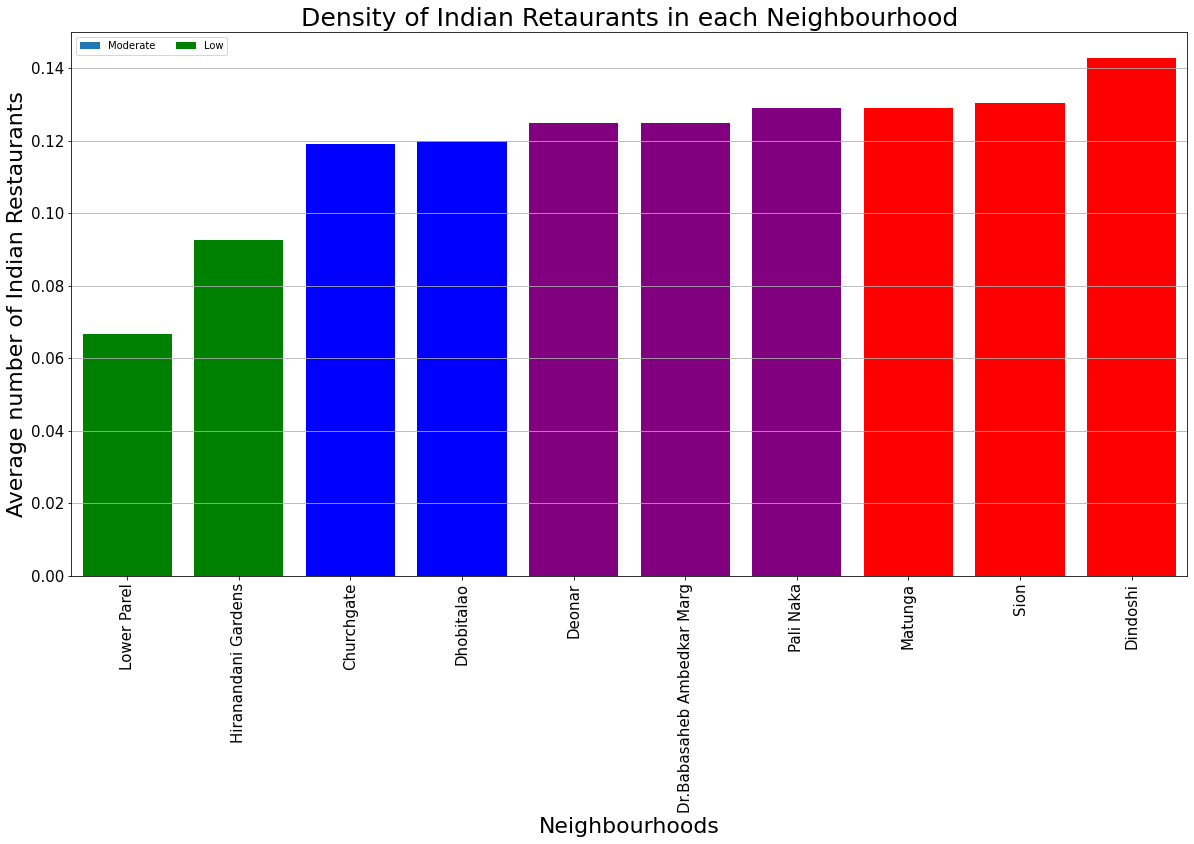

In [98]:
c=['green','green','blue','blue','purple','purple','purple','red','red','red']
lable=["Moderate","Low", "Medium", "high"]
ax=Mumbai_Indian_Restaurants.plot(kind='bar', figsize=(20, 10))
ax.bar(Mumbai_Indian_Restaurants.index,Mumbai_Indian_Restaurants['Indian Restaurant'],color=c, label=lable)
plt.xlabel('Neighbourhoods', fontsize=22) # add to x-label to the plot
plt.ylabel('Average number of Indian Restaurants', fontsize=22) # add y-label to the plot
plt.title('Density of Indian Retaurants in each Neighbourhood', fontsize=25) # add title to the plot
plt.grid(axis='y')
plt.legend(lable, loc='upper left', ncol=10, frameon=True)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

## 5. Conclusion:

This project recommends some of the ideal places to open an Indian restaurant in Mumbai, India. The analysis shows there are better scopes for opening restaurant in Church Gate and D.N.Bagar; Dhobi Talou and Cuffe Parade are also good location. This analysis can be helpful for the individuals looking for opening a restaurant or expanding business. This analysis shows the feasible venture and competition landscape of the area.
Final decision on optimal restaurant location will be made by stakeholders based on specific characteristics of neighbourhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location, levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighbourhood etc.
